# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Mini Project: Credit Card Default Risk Analysis

## Learning Objectives

At the end of the mini project, you will be able to

* understand the application of machine learning in finacial sector
* use a real world dataset.
* compare between different types of classification methods and their pros and cons.

**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing



### Dataset Description

The dataset chosen for this mini project is [default of credit card clients Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) with 30000 instances each having 25 attributes.



In [1]:
# import the libraries used for machine learning
import numpy as np
import pandas as pd
import scipy.optimize as opt

import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
#from pandas_profiling import ProfileReport
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve

import os

**Exercise 1**: Load the data show the top few rows of the dataframe.  (***1 point***)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving default of credit card clients.xls to default of credit card clients.xls


In [3]:
# Load data into a dataframe & display top few rows
data = pd.read_excel('default of credit card clients.xls')
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
data = data.drop(labels=0, axis=0)
# YOUR CODE HERE
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Exercise 2**: Perform the following

- Exploratory Data Analysis (***2 points***)
- Preprocessing (***2 points***)

## Exploratory data analysis

there are total 23 explanatory variables and one response variable. Some variable need to be converted to categories. such as.

* __Gender(X2)__
1 = Male, 2 = Female

* __EDUCATION(X3)__
1 = graduate school; 2 = university; 3 = high school; 4 = others
* __Marital status(X4)__
1 = married; 2 = single; 3 = others
* __Repayment status(X6-X11)__
   -2= no consumption, -1= pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ...,8 = payment delay for eight months,9 = payment delay for nine months and above

   these variables should be converted to categorical variable


In [5]:
# YOUR CODE HERE   # drop column "ID"
data = data.drop(data.columns[[0]], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null

### Statistics
The detail statistics of the dataset

In [28]:
print("STATISTICS OF NUMERIC COLUMNS")
print()
print(data.describe().T)
data_copy = data.copy()
data_copy = data_copy.apply(pd.to_numeric, errors='coerce')
print(data_copy.describe().T)

STATISTICS OF NUMERIC COLUMNS

     count  unique    top   freq
X1   30000      81  50000   3365
X2   30000       2      2  18112
X3   30000       7      2  14030
X4   30000       4      2  15964
X5   30000      56     29   1605
X6   30000      11      0  14737
X7   30000      11      0  15730
X8   30000      11      0  15764
X9   30000      11      0  16455
X10  30000      10      0  16947
X11  30000      10      0  16286
X12  30000   22723      0   2008
X13  30000   22346      0   2506
X14  30000   22026      0   2870
X15  30000   21548      0   3195
X16  30000   21010      0   3506
X17  30000   20604      0   4020
X18  30000    7943      0   5249
X19  30000    7899      0   5396
X20  30000    7518      0   5968
X21  30000    6937      0   6408
X22  30000    6897      0   6703
X23  30000    6939      0   7173
Y    30000       2      0  23364
       count           mean            std       min       25%       50%  \
X1   30000.0  167484.322667  129747.661567   10000.0  50000.00  1400

In [7]:
data.X2.value_counts() # male, female counts

2    18112
1    11888
Name: X2, dtype: int64

In [8]:
data.X3.value_counts() #Education categories

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: X3, dtype: int64

In [9]:
data.X4.value_counts() # Marriage catagories

2    15964
1    13659
3      323
0       54
Name: X4, dtype: int64

In [10]:
data.X6.describe()

count     30000
unique       11
top           0
freq      14737
Name: X6, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null

# Visualization

Text(0, 0.5, 'Count')

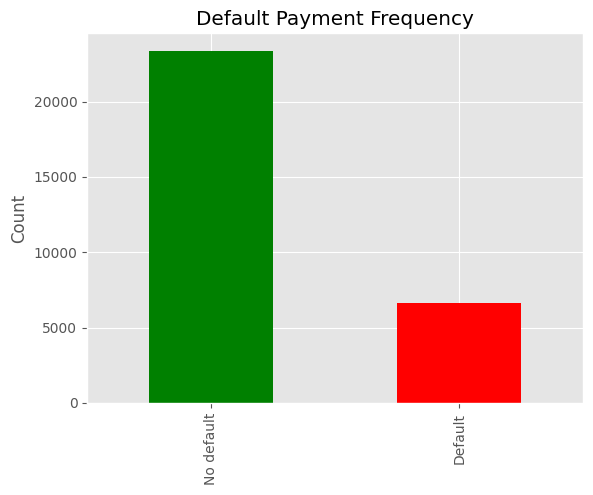

In [12]:
from IPython.core.pylabtools import figsize
# plot the frequency of defaults
# YOUR CODE HERE
plt.title('Default Payment Frequency')
xlabels = data['Y'].value_counts().plot(kind = 'bar', color=['Green', 'Red'])
xlabels.set_xticklabels(['No default', 'Default'])
plt.ylabel("Count")

<ipython-input-13-e5f598193a35>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


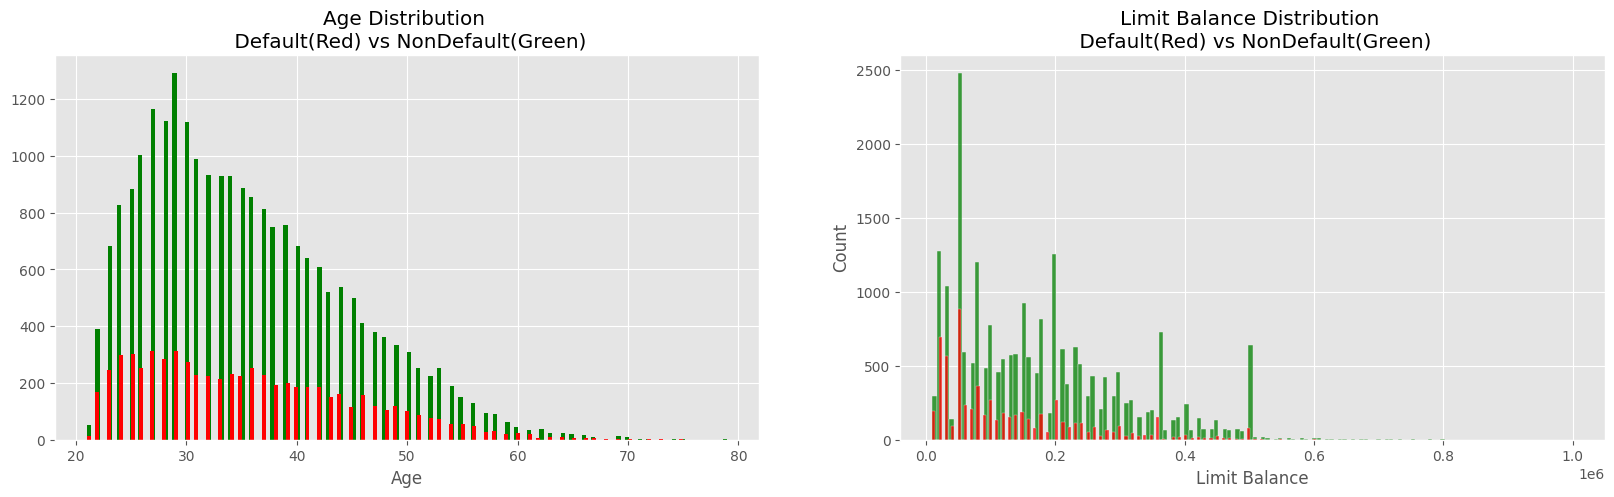

In [13]:
# Plot distribution of age and limit balance
plt.subplots(figsize=(20,5))
plt.subplot(121)
# Plot Age Distribution
plt.title('Age Distribution \n Default(Red) vs NonDefault(Green)')
plt.hist(data[data['Y'] == 0]['X5'], bins = 150, color = 'Green')
plt.hist(data[data['Y'] == 1]['X5'], bins = 150, color = 'Red')
plt.xlabel("Age")

plt.subplot(122)
# Plot Limit Balance Distribution
plt.title('Limit Balance Distribution \n Default(Red) vs NonDefault(Green)')
sns.histplot(data[data['Y'] == 0]['X1'], bins = 150, color = 'Green')
sns.histplot(data[data['Y'] == 1]['X1'], bins = 150, color = 'Red')
plt.xlabel("Limit Balance")

plt.show()

Text(0, 0.5, 'Age')

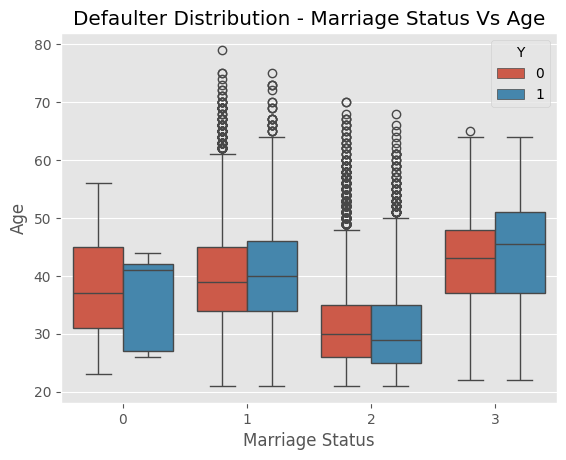

In [14]:
#Plot the defaulter(Y), marriage(X4) vs age(X5) use seborn library

plt.title('Defaulter Distribution - Marriage Status Vs Age')
sns.boxplot(data=data,x='X4',y='X5', hue = 'Y')
plt.xlabel("Marriage Status")
plt.ylabel("Age")

Text(0, 0.5, 'Age')

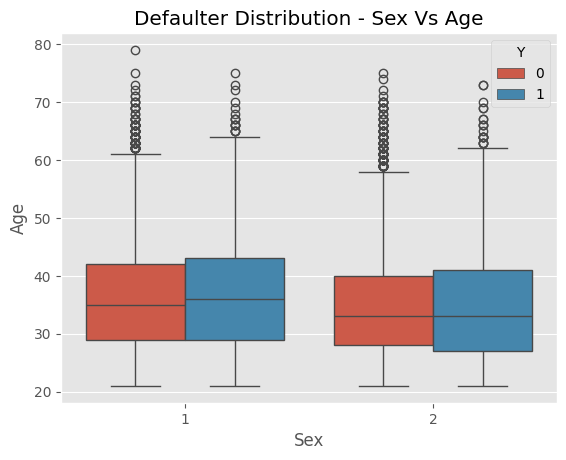

In [15]:
# plot the defaulter(Y), sex(X2) vs age(X5)

plt.title('Defaulter Distribution - Sex Vs Age')
sns.boxplot(data=data,x='X2',y='X5', hue = 'Y')
plt.xlabel("Sex")
plt.ylabel("Age")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X2      30000 non-null  int64
 2   X3      30000 non-null  int64
 3   X4      30000 non-null  int64
 4   X5      30000 non-null  int64
 5   X6      30000 non-null  int64
 6   X7      30000 non-null  int64
 7   X8      30000 non-null  int64
 8   X9      30000 non-null  int64
 9   X10     30000 non-null  int64
 10  X11     30000 non-null  int64
 11  X12     30000 non-null  int64
 12  X13     30000 non-null  int64
 13  X14     30000 non-null  int64
 14  X15     30000 non-null  int64
 15  X16     30000 non-null  int64
 16  X17     30000 non-null  int64
 17  X18     30000 non-null  int64
 18  X19     30000 non-null  int64
 19  X20     30000 non-null  int64
 20  X21     30000 non-null  int64
 21  X22     30000 non-null  int64
 22  X23     30000 non-null  int64
 23  Y       300

<Axes: >

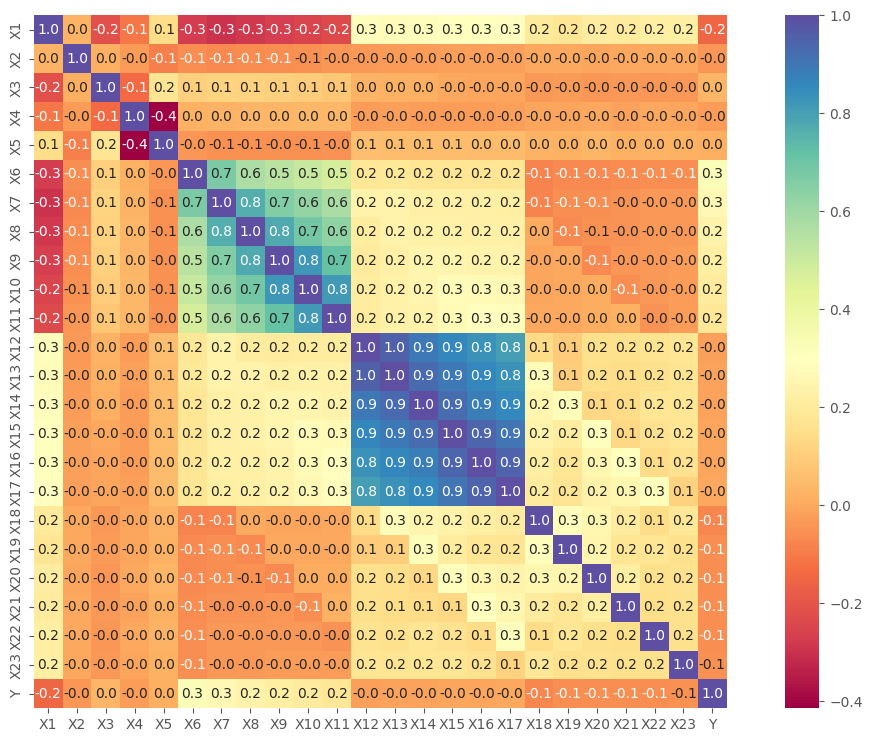

In [17]:
#Display Correlation of data
data_copy = data.copy()
data_copy = data_copy.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize = (15,9))
data_copy.info()
sns.heatmap(data_copy.corr(),square = True, cmap = 'Spectral',annot = True, fmt = ".1f")

# Preprocessing

In [18]:
{'X3': 'EDU'}.items()

dict_items([('X3', 'EDU')])

In [19]:
# write a function for onehot_encode
def onehot_encode(df, column_dict):
    df = df.copy()
    for column,prefix in column_dict.items():
      dummies = pd.get_dummies(df[column], prefix = prefix)
      df = pd.concat([df,dummies], axis = 1)
      df = df.drop(column, axis = 1)
    return df

In [20]:
def preprocess_inputs(df):
    df = df.copy()



    df = onehot_encode(
        df,
        {
            'X3': 'EDU',
            'X4': 'MAR'
        }
    )

    # Split df into X and y
    y = df['Y'].copy()
    X = df.drop('Y', axis=1).copy()

    # Scale X with a standard scaler
    sc = StandardScaler()
    X = pd.DataFrame(sc.fit_transform(X), columns = X.columns)


    return X, y

In [21]:
X, y = preprocess_inputs(data)

<ipython-input-19-5a3f17bb51a9>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[column], prefix = prefix)
<ipython-input-19-5a3f17bb51a9>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df[column], prefix = prefix)


In [22]:
X

,X1,X2,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
29996,-0.134759,-1.234323,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29997,-1.059646,-1.234323,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29998,-0.674276,-1.234323,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326


In [23]:
y

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: Y, Length: 30000, dtype: object

In [24]:
#Unique Value Counts of each feature
{column: len(X[column].unique()) for column in X.columns}

{'X1': 81,
 'X2': 2,
 'X5': 56,
 'X6': 11,
 'X7': 11,
 'X8': 11,
 'X9': 11,
 'X10': 10,
 'X11': 10,
 'X12': 22723,
 'X13': 22346,
 'X14': 22026,
 'X15': 21548,
 'X16': 21010,
 'X17': 20604,
 'X18': 7943,
 'X19': 7899,
 'X20': 7518,
 'X21': 6937,
 'X22': 6897,
 'X23': 6939,
 'EDU_0': 2,
 'EDU_1': 2,
 'EDU_2': 2,
 'EDU_3': 2,
 'EDU_4': 2,
 'EDU_5': 2,
 'EDU_6': 2,
 'MAR_0': 2,
 'MAR_1': 2,
 'MAR_2': 2,
 'MAR_3': 2}

**Exercise 3** (3 Points)

Train the model using the 4 ML models:

- Logistic Regression
- Perceptron
- SVM

## Training

Application of machine learning models, such as

### Logistic Regression
Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, more popularly called the sigmoid function was to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment.

It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$\frac{1}{ (1 + e^{-value})}$

Where $e$ is the base of the natural logarithms and value is the actual numerical value that you want to transform. Below is a plot of the numbers between $-5$ and $5$ transformed into the range $0$ and $1$ using the logistic function.





### The Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (shown in the figure below) called a **threshold logic unit (TLU)**. The inputs and the output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $$(z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^⊺ w)$$, then applies a step function to that sum and outputs the result: $$h_w(x) = step(z)$$, where $z = x^⊺ w$.
<br><br>
<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1004.png" width= 400px/>
</center>

$\hspace{10cm} \text {Threshold logic unit}$
<br><br>
The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$heaviside (z) = \begin{equation}
\left\{
  \begin{aligned}
    &0&  if\ \  z < 0\\
    &1&  if\ \  z \ge 0\\
  \end{aligned}
  \right.
\end{equation}
$$

$$sgn (z) = \begin{equation}
\left\{
  \begin{aligned}
    &-1&  if\ \  z < 0\\
    &0&  if\ \  z = 0\\
    &1&  if\ \  z > 0\\
  \end{aligned}
  \right.
\end{equation}
$$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class.



The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the Perceptron convergence theorem.

### Support Vector Machines: Maximizing the Margin

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

### Random Forests

A random forest is a collection of decision trees whose results are aggregated into one final result. Random Forest  is a supervised classification algorithm. There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result. But here creating the forest is not the same as constructing the decision tree with the information gain or gain index approach.

The difference between the Random Forest algorithm and the decision tree algorithm is that in Random Forest, the process of finding the root node and splitting the feature nodes will run randomly.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
print(y_train.dtype)

object


In [26]:
#Train Model
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

#Logistic Regression Model
model1 = LogisticRegression(random_state = 0)
model1.fit(X_train,y_train)
model1_cv_scores = cross_val_score(estimator = model1, X = X_train, y = y_train, cv = 5 )

#SVM Model
model2 = SVC(kernel = 'linear')
model2.fit(X_train,y_train)
model2_cv_scores = cross_val_score(estimator = model2, X = X_train, y = y_train, cv = 5 )

#Perceptron Model
model3 = Perceptron()
model3.fit(X_train,y_train)
model3_cv_scores = cross_val_score(estimator = model3, X = X_train, y = y_train, cv = 5 )

#Display Mean Cross Value Scores
print(f'Logistics Regression Mean CV Score: {model1_cv_scores.mean()} \n')
print(f'SVM Mean CV Score                 : {model2_cv_scores.mean()} \n')
print(f'Perceptron Mean CV Score          : {model3_cv_scores.mean()} \n')

Logistics Regression Mean CV Score: 0.8105238095238096 

SVM Mean CV Score                 : 0.8095238095238095 

Perceptron Mean CV Score          : 0.7567142857142857 



**Exercise 4**

Evaluate the models and display the results ( 2 points)

### Model Evaluation

To evaluate the performance of a classification model, the following metrics are used:

* Confusion matrix
  * Accuracy
  * Precision
  * Recall
  * F1-Score

Classification Report Logistics Regression: 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7052
           1       0.70      0.25      0.37      1948

    accuracy                           0.81      9000
   macro avg       0.76      0.61      0.63      9000
weighted avg       0.80      0.81      0.78      9000


Classification Report Support Vector Machine: 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7052
           1       0.69      0.24      0.35      1948

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000


Classification Report Perceptron: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      7052
           1       0.35      0.29      0.32      1948

    accuracy                           0.73      9000

<ipython-input-27-c97cf54ae501>:41: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


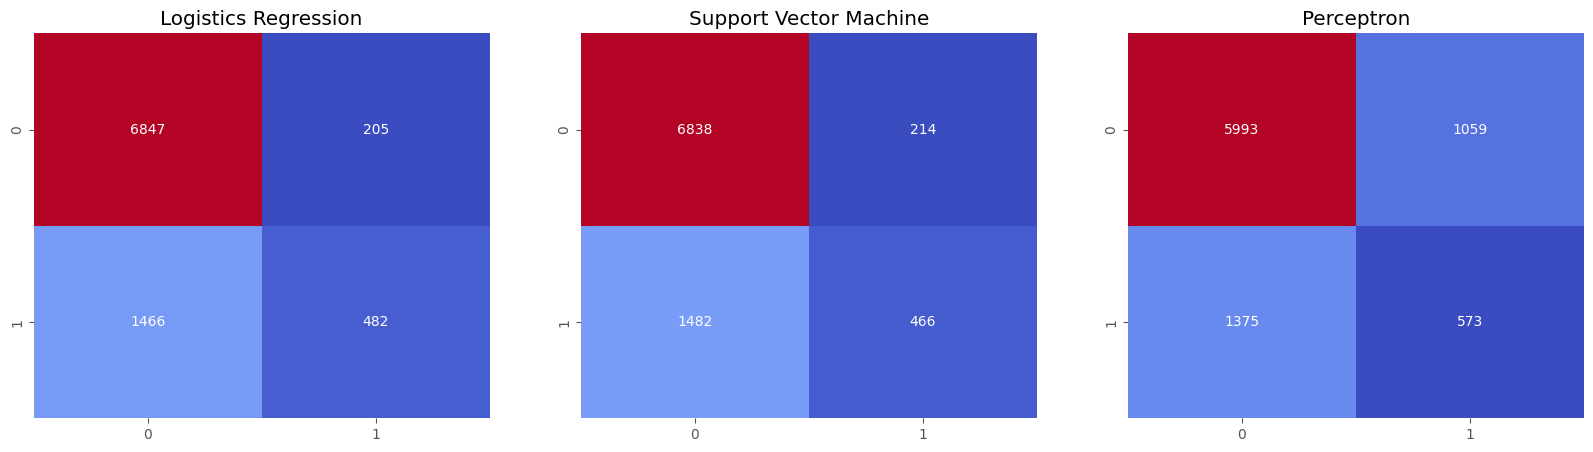

In [27]:
# Predict And Compare the Results
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_test = le.fit_transform(y_test)

#Display Classification Report
print(f'Classification Report Logistics Regression: \n{classification_report(y_test, y_pred1)}')
print(f'\nClassification Report Support Vector Machine: \n{classification_report(y_test, y_pred2)}')
print(f'\nClassification Report Perceptron: \n{classification_report(y_test, y_pred3)}')

from sklearn.metrics import f1_score
f1_1 = f1_score(y_test, y_pred1)
f1_2 = f1_score(y_test, y_pred2)
f1_3 = f1_score(y_test, y_pred3)

from sklearn.metrics import accuracy_score
acc_1 = accuracy_score(y_test, y_pred1)
acc_2 = accuracy_score(y_test, y_pred2)
acc_3 = accuracy_score(y_test, y_pred3)

from sklearn.metrics import roc_auc_score
roc_1 = roc_auc_score(y_test, y_pred1)
roc_2 = roc_auc_score(y_test, y_pred2)
roc_3 = roc_auc_score(y_test, y_pred3)

#Display Model with F1_Score, Accuracy & ROC_AUC
result = [['Logistics Regression','{:.4f}'.format(f1_1),'{:.4f}'.format(acc_1),'{:.4f}'.format(roc_1)],
          ['Support Vector Machine','{:.4f}'.format(f1_2),'{:.4f}'.format(acc_2),'{:.4f}'.format(roc_2)],
          ['Perceptron','{:.4f}'.format(f1_3),'{:.4f}'.format(acc_3),'{:.4f}'.format(roc_3)]]
columns = ['Model','F1 Score','Accuracy','ROC_AUC']

results_data = pd.DataFrame(np.transpose(result), columns)
print(f'\n\n\n{np.transpose(results_data)} \n\n\n')

#Calculate & Display Confusion Matrix for each trained models
cf_matrix1 = confusion_matrix(y_test, y_pred1)
cf_matrix2 = confusion_matrix(y_test, y_pred2)
cf_matrix3 = confusion_matrix(y_test, y_pred3)
plt.subplots(figsize=(20,5))
plt.subplot(131)
sns.heatmap(cf_matrix1, annot = True, fmt = 'd', cmap = 'coolwarm', cbar = False)
plt.title("Logistics Regression")
plt.subplot(132)
sns.heatmap(cf_matrix2, annot = True, fmt = 'd', cmap = 'coolwarm', cbar = False)
plt.title("Support Vector Machine")
plt.subplot(133)
sns.heatmap(cf_matrix3, annot = True, fmt = 'd', cmap = 'coolwarm', cbar = False)
plt.title("Perceptron")
plt.show()